<a href="https://colab.research.google.com/github/Carocschall/CoderHouse/blob/main/CalidadVino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
url='https://raw.githubusercontent.com/Carocschall/CoderHouse/main/WineQT.csv'
df= pd.read_csv(url,sep=',', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,2
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,3


**Variables incorporadas**

0. Acidez fija. Conjunto de ácidos naturales del vino que ya hemos visto anteriormente (tartárico, málico, cítrico, succínico y láctico) (AF).
1. Acidez volátil. Cantidad de ácido acético del vino. La medida normal es de 0,3 a 0,6 gramos por litro. Cuanto menor acidez volátil tenga un vino mayor será la calidad. (AV).
2. Acidez cítrica. Es el ácido menos común en el vino, produce una sensación de acidez muy fresca y brillante en el paladar. (AC).
3. Azúcar residual. Es lo que queda después de que las uvas hayan pasado por el proceso de elaboración del vino (AR).
4. Cloruros. Uno de los principales componentes de las sales en el vino son los cloruros, las sales minerales en el vino producen en organismo placer organoléptico, favorecen la hidratación, resalta sabores de los alimentos (mg/L.(CL).
5. Dióxido sulfúrico libre. El SO2 se añade durante la elaboración del vino como conservante, lo que permite obtener vinos con menor oxidación al inhibir la reacción del oxígeno gracias a su capacidad reductora. Esto mejora las propiedades organolépticas del vino, realzando su sabor, color y aroma.(DSL).
6. Dióxido sulfúrico total. El Dióxido de azufre se usa para preservar el color, sabor y estabilidad del vino. Al ser un antimicrobiano, el SO2 interfiere con los caminos metabólicos de la levadura y bacterias. (DST)
7. Densidad. En los vinos, el azúcar se ha transformado en alcohol, cuya densidad es 0,798.(DEN).
8. Grado de acidez o alcalinidad. La mayoría de los vinos tienen un valor de pH entre 3.0 y 4.0. (GA).
9. Sulfatos. Los sulfitos del vino se utilizan para detener la fermentación en un punto específico del proceso de elaboración vinícola. Además, son conservantes que previenen el deterioro y la oxidación, y brindan protección contra las bacterias.(SUL).
10. Alcohol. En el caso de los vinos, cabe destacar que, según indica la legislación vigente, su graduación mínima será de 9% vol (ALC).
11. Calidad. Combinación de los componentes anteriores (CAL).
12. Identificación (ID).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AF      1144 non-null   object
 1   AV      1144 non-null   object
 2   AC      1144 non-null   object
 3   AR      1144 non-null   object
 4   CL      1144 non-null   object
 5   DSL     1144 non-null   object
 6   DST     1144 non-null   object
 7   DEN     1144 non-null   object
 8   GA      1144 non-null   object
 9   SUL     1144 non-null   object
 10  ALC     1144 non-null   object
 11  CAL     1144 non-null   object
 12  ID      1144 non-null   object
dtypes: object(13)
memory usage: 116.3+ KB


In [6]:
df.shape

(1144, 13)

In [4]:
# renombramos las columnas
df= df.rename(columns={0: "AF", 1: "AV", 2: "AC",3:"AR",4:"CL",5:"DSL",6:"DST",7:"DEN",8:"GA",9:"SUL",10:"ALC",11:"CAL",12:"ID"})
df.head()

,AF,AV,AC,AR,CL,DSL,DST,DEN,GA,SUL,ALC,CAL,ID
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,2
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,3


In [7]:
resumen=df.describe().round(1)
resumen

,AF,AV,AC,AR,CL,DSL,DST,DEN,GA,SUL,ALC,CAL,ID
count,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144
unique,92,136,78,81,132,54,139,389,88,90,62,7,1144
top,7.2,0.6,0.0,2.0,0.08,6.0,28.0,0.9976,3.3,0.6,9.5,5,Id
freq,43,32,99,107,48,99,36,27,41,53,92,483,1


In [9]:
print(df.isna().sum())

AF     0
AV     0
AC     0
AR     0
CL     0
DSL    0
DST    0
DEN    0
GA     0
SUL    0
ALC    0
CAL    0
ID     0
dtype: int64


In [13]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144
unique,92,136,78,81,132,54,139,389,88,90,62,7,1144
top,7.2,0.6,0.0,2.0,0.08,6.0,28.0,0.9976,3.3,0.6,9.5,5,Id
freq,43,32,99,107,48,99,36,27,41,53,92,483,1


In [14]:
# remover filas con na
df.dropna(inplace=True)
# mirar el resultado final
df.shape

(1144, 13)

In [15]:
df.iloc[0]

0            fixed acidity
1         volatile acidity
2              citric acid
3           residual sugar
4                chlorides
5      free sulfur dioxide
6     total sulfur dioxide
7                  density
8                       pH
9                sulphates
10                 alcohol
11                 quality
12                      Id
Name: 0, dtype: object

In [17]:
from numpy import nan
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer
url='https://raw.githubusercontent.com/Carocschall/CoderHouse/main/WineQT.csv'
df= pd.read_csv(url,sep=',', header=None)
df=df.replace(0, np.nan)
print(df.shape)
print(df.head())

(1144, 13)
              0                 1            2               3          4   \
0  fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
1            7.4               0.7          0.0             1.9      0.076   
2            7.8              0.88          0.0             2.6      0.098   
3            7.8              0.76         0.04             2.3      0.092   
4           11.2              0.28         0.56             1.9      0.075   

                    5                     6        7     8          9   \
0  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
1                 11.0                  34.0   0.9978  3.51       0.56   
2                 25.0                  67.0   0.9968   3.2       0.68   
3                 15.0                  54.0    0.997  3.26       0.65   
4                 17.0                  60.0    0.998  3.16       0.58   

        10       11  12  
0  alcohol  quality  Id  
1      9.4        5   0

In [18]:
# Crear un numpy array con los valores
valores = df.values
# definir el imputador
imputador = SimpleImputer(missing_values=np.nan, strategy='mean')
# transformar el dataset
transformados = imputador.fit_transform(valores)
# Contar el numero de NaN en cada columna
print('Missing: ', isnan(transformados).sum())

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'fixed acidity'

In [19]:
transformados=pd.DataFrame(transformados)
#transformados= transformados.rename(columns={0: "AF", 1: "AV", 2: "AC",3:"AR",4:"CL",5:"DSL",6:"DST",7:"DEN",8:"GA",9:"SUL",10:"ALC",11:"CAL",12:"ID"})
print(transformados.head().round(2))

NameError: name 'transformados' is not defined

**Preguntas de análisis:**

1. ¿Qué aspecto es de mayor impacto en relación a la calidad del vino?
2. ¿La densidad del vino se relaciona directamente con la calidad del mismo?

**H:** La calidad del vino se encuentra correlacionada directamente con la combinación de factores que intervinen en su proceso.

In [4]:
import pandas as pd

import matplotlib as mpl

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

In [5]:
mpl.style.use('seaborn')

<ipython-input-5-2f1545674514>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


In [6]:
plt.style.use("bmh")

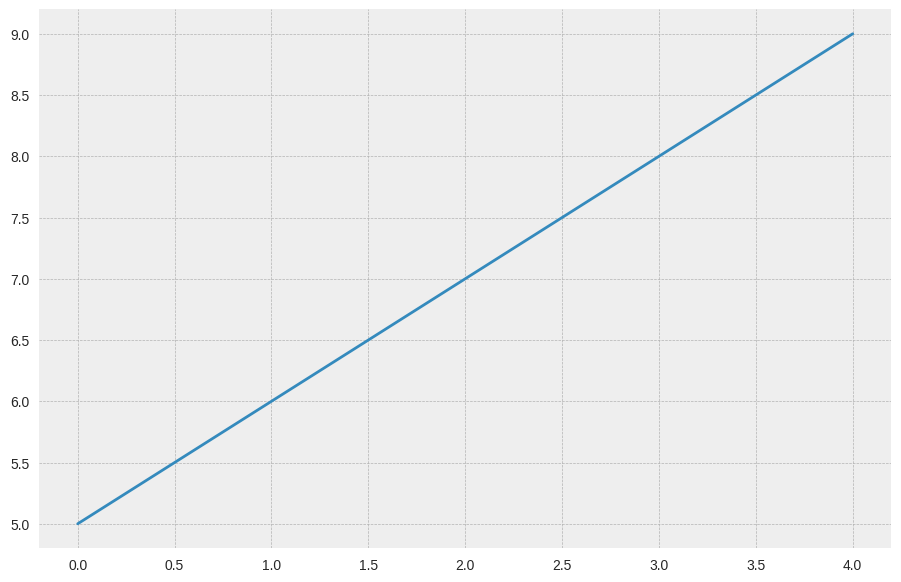

In [10]:
fig, ax = plt.subplots(figsize=(11,7))



ax.plot([0,4],[5,9])



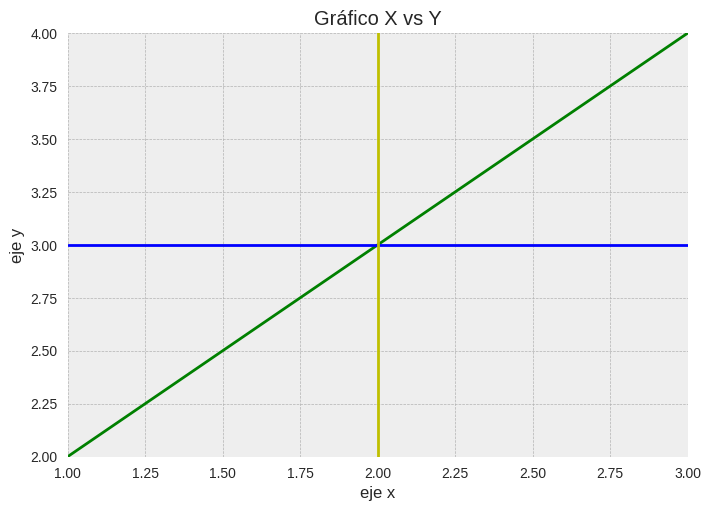

In [17]:
fig, ax = plt.subplots()
ax.plot([1,3],[2,4], color='g')

ax.set_ylim([2,4])
ax.set_xlim([1,3])
ax.set_xlabel('eje x')
ax.set_ylabel('eje y')
ax.set_title('Gráfico X vs Y')
ax.axhline(y=3, xmin=0, xmax=4, color='b')
ax.axvline(x=2, ymin=0, ymax=10, color='y')

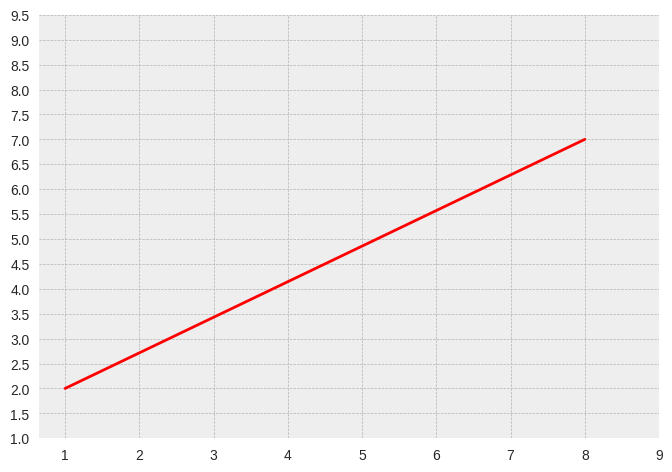

In [19]:
fix, ax = plt.subplots()
ax.plot([1, 8], [2, 7], color='r')

ax.set_yticks(np.arange(1.0, 10.0, 0.5))
ax.set_xticks(range(1, 10))
plt.show()